# Creating figure 4
This notebook generates figure 4 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape. The color closest to 0 was set to white in inkscape.

In [1]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)
import scipy.io

In [2]:
a = AnalysisTools('fig_3-7_data/knp_long.h5')
cell_morphology = scipy.io.loadmat('fig_3-7_data/cell_morphology.mat')
neuron_data = h5py.File('fig_3-7_data/neuron_data.hdf5','r')

In [3]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01


In [4]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6

measurement_point = [20,20,20]

In [5]:
def plot_func_with_neuron(t_idx, ion_idx, levels, c_init, cticks, title='', cmap='RdBu', clabel='', factor=1.):
    Z = np.zeros([100, 100])

    k = t_idx
    u = Function(a.W)
    c = Function(a.V)
    a.hdf.read(u, '/solution/vector_'+str(k))
    c.assign(project(u.sub(ion_idx), a.V))
    for i,x in enumerate(x_array):
        for j,y in enumerate(y_array):
            p = Point(x,y,zmid)
            Z[j,i] = c(p)
    
    
    Z = Z*factor
    Z = Z-c_init
    plt.figure(figsize=(2.4,2.4))
    # print(X.shape, Y.shape, Z[:,:].shape)
#     levels = np.linspace(vmin-c_init, vmax-c_init, 9)
    plt.contourf(X,Y,1000*Z, cmap=cmap, levels=levels)
#     plt.contourf(X,Y,1000*Z, cmap=cmap)
    
#     if vmax > vmin:
#         plt.pcolormesh(X,Y,Z, cmap=cmap, vmin=vmin, vmax=vmax)
#     else:
#         plt.pcolormesh(X,Y,Z, cmap=cmap)
    # plt.axis('image')
#     if ion_idx==2:
#         cbar = plt.colorbar(ticks=[-0.01, -0.005, 0, 0.005, 0.01])
#     elif ion_idx==1:
#         cbar = plt.colorbar(ticks=[-0.03, -0.02, -0.01])
#     else:
    cbar = plt.colorbar(ticks=cticks)
#     cbar = plt.colorbar()
        
    
    xstart = (cell_morphology['xstart'][0])
    xend = (cell_morphology['xend'][0])

    ystart = (cell_morphology['ystart'][0])
    yend = (cell_morphology['yend'][0])

    NN = cell_morphology['N'][0][0]

    [plt.plot([xstart[idx], xend[idx]], [ystart[idx], yend[idx]], c='k', linewidth=0.4, zorder=1) for idx in range(NN)]   
    
    plt.axis("image")
    plt.title(title)
    plt.scatter([measurement_point[0]], [measurement_point[1]], 25, c='lightgreen', edgecolor='k', zorder=2)

    plt.scatter([-100], [1100], 25, c='magenta', edgecolor='k', zorder=2)
    
    cbar.set_label(clabel)
    plt.plot([100, 200], [1100, 1100], 'k')
    plt.text(105, 1000, r'100 \textmu m')
    plt.xticks([])
    plt.yticks([])
    
    return Z


<IPython.core.display.Javascript object>


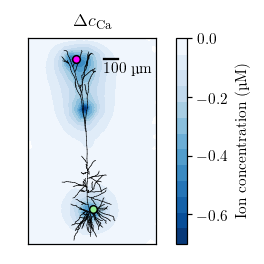

<IPython.core.display.Javascript object>


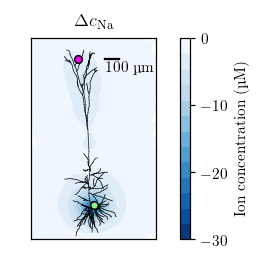

<IPython.core.display.Javascript object>


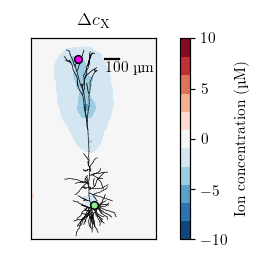

<IPython.core.display.Javascript object>


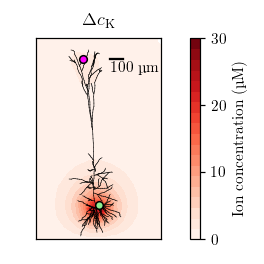

In [31]:
t_idx = 800

title_ca = r'$\Delta c_\mathrm{Ca}$'
c_init = 1.4
vmin = -0.0007
vmax = 0.0
levels = np.linspace(vmin,vmax, 14)*1000
cticks = np.array([-0.0008, -0.0006, -0.0004, -0.0002, 0])*1e3
Z_ca = plot_func_with_neuron(t_idx, 0, levels, c_init, cticks, title=title_ca, cmap='Blues_r', clabel=r'Ion concentration (\textmu M)')
plt.tight_layout()
plt.savefig('ca.pdf')

title_na = r'$\Delta c_\mathrm{Na}$'
c_init = 150
vmin = -0.03
vmax = 0.0
levels = np.linspace(vmin,vmax, 14)*1000
cticks = np.array([-0.03, -0.02, -0.01, 0])*1000
Z_na = plot_func_with_neuron(t_idx, 1, levels, c_init, cticks, title=title_na, cmap='Blues_r', clabel=r'Ion concentration (\textmu M)')
plt.tight_layout()
plt.savefig('na.pdf')

title_x = r'$\Delta c_\mathrm{X}$'
c_init = 155.8
vmin = -0.01
vmax = 0.01
levels = np.linspace(vmin,vmax, 12)*1000
cticks = np.array([-0.01, -0.005, 0, 0.005, 0.01])*1e3
Z_x = plot_func_with_neuron(t_idx, 2, levels, c_init, cticks, title=title_x, cmap='RdBu_r', clabel=r'Ion concentration (\textmu M)')
plt.tight_layout()
plt.savefig('X.pdf')

title_k = r'$\Delta c_\mathrm{K}$'
c_init = 3
vmin = 0.0
vmax = 0.03
levels = np.linspace(vmin,vmax, 20)*1000
cticks = np.array([0, 0.01, 0.02, 0.03])*1e3
Z_k = plot_func_with_neuron(t_idx, 3, levels, c_init, cticks, title=title_k, cmap='Reds', clabel=r'Ion concentration (\textmu M)')
plt.tight_layout()
plt.savefig('k.pdf')

plt.show()

<IPython.core.display.Javascript object>


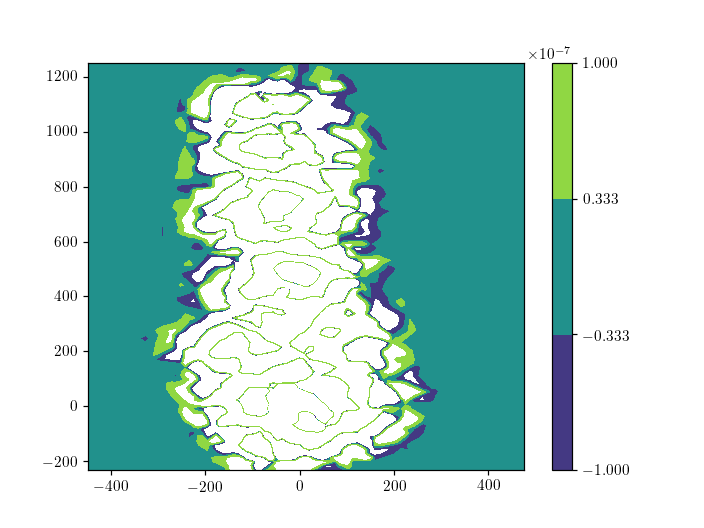

In [33]:
plt.figure()
plt.contourf(X,Y, 2*Z_ca + Z_na + Z_k - Z_x, levels=np.linspace(-0.0000001, 0.0000001,4))
plt.colorbar()
plt.show()

In [ ]:
cbar = plt.colorbar()

In [ ]:
Z = np.zeros([100,100])


In [ ]:
fig = plt.contourf(X,Y,X, cmap='RdBu')

In [ ]:
fig.

In [ ]:
cmap = cbar.cmap

In [ ]:
cmap.